In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/testcifar100/cloud_2.jpg
/kaggle/input/testcifar100/cloud_1.jpg
/kaggle/input/testcifar100/mouse_test.jpg
/kaggle/input/testcifar100/lizard_test1.jpg
/kaggle/input/testcifar100/tiger.jpg
/kaggle/input/cifar100/meta
/kaggle/input/cifar100/file.txt
/kaggle/input/cifar100/test
/kaggle/input/cifar100/train


Load input datasets

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD

Import Libraries

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

169017344/169001437 [==============================] - 6s 0us/step


Load values for variables to train and test

<function matplotlib.pyplot.show(close=None, block=None)>

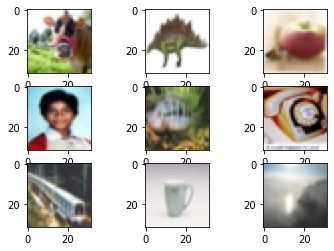

In [4]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

Show some examples in X_train

In [5]:
cifar_100_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 
                   'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 
                   'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 
                   'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 
                   'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 
                   'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 
                   'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 
                   'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 
                   'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 
                   'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 
                   'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 
                   'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 
                   'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 
                   'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 
                   'snail', 'snake', 'spider', 'squirrel', 'streetcar', 
                   'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 
                   'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
                   'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

Create a labels names

In [6]:
name_of_labels = []
for i in range(len(cifar_100_labels)):
    name_of_labels += [i]

reverse_mapping = dict(zip(name_of_labels, cifar_100_labels)) 

def mapper(value):
    return reverse_mapping[value]

Get the name of the classes labels

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

- Normalize variable data X_train and x_test
- Convert output data to 100-bit binary

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


Checked shape of variables before start create model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(100, activation = 'softmax'))

2022-05-16 05:12:53.590780: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 05:12:53.701314: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 05:12:53.702046: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 05:12:53.703457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Create model using CNN with 3 layers:
- Convolutional 2D
- Padding (3, 3)
- MaxPooling 2D

In [10]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Compile model using Stochastic Gradient Descent (SGD)

In [11]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-16 05:12:58.654130: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-05-16 05:13:00.032036: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


782/782 [==============================] - 13s 7ms/step - loss: 4.1788 - accuracy: 0.0636 - val_loss: 3.7206 - val_accuracy: 0.1330
Epoch 2/100
782/782 [==============================] - 5s 6ms/step - loss: 3.4562 - accuracy: 0.1706 - val_loss: 3.2019 - val_accuracy: 0.2208
Epoch 3/100
782/782 [==============================] - 5s 6ms/step - loss: 3.0557 - accuracy: 0.2400 - val_loss: 2.9759 - val_accuracy: 0.2657
Epoch 4/100
782/782 [==============================] - 5s 6ms/step - loss: 2.7684 - accuracy: 0.2997 - val_loss: 2.7588 - val_accuracy: 0.3050
Epoch 5/100
782/782 [==============================] - 5s 6ms/step - loss: 2.5432 - accuracy: 0.3432 - val_loss: 2.7112 - val_accuracy: 0.3199
Epoch 6/100
782/782 [==============================] - 5s 6ms/step - loss: 2.3549 - accuracy: 0.3817 - val_loss: 2.4884 - val_accuracy: 0.3585
Epoch 7/100
782/782 [==============================] - 5s 6ms/step - loss: 2.2086 - accuracy: 0.4118 - val_loss: 2.4445 - val_accuracy: 0.3748
Epoch 8/10

Start training model 100 times with batch size = 64.

In [12]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 3.7648 - accuracy: 0.3447


Evaluate Model

In [13]:
model.save('cifar100_cnn.h5')

Save model to h5 file

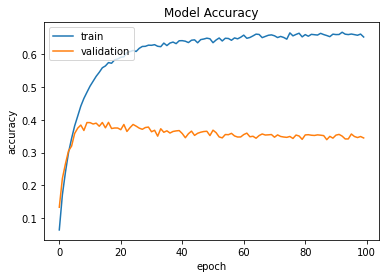

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')

Plot the results for accuracy and validation_accuracy

In [15]:
y_pred = model.predict(X_test)

Model predict X_test

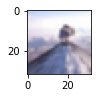

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


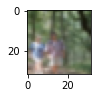

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


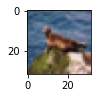

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


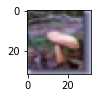

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


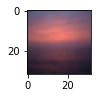

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


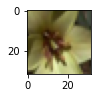

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


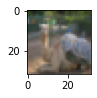

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


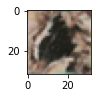

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


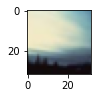

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [16]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[i])
  plt.show()  
  print(np.round(y_pred[i]))

Show some examples predict X_test

Prediction is  mountain


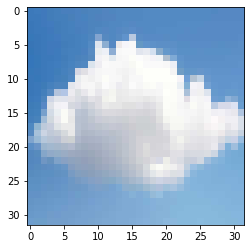

In [17]:
image = tf.keras.preprocessing.image.load_img('../input/testcifar100/cloud_2.jpg', target_size=(32, 32))
plt.imshow(image)
image = tf.keras.preprocessing.image.img_to_array(image) 
image = image.reshape(1, 32, 32, 3)
image = image.astype('float32')
image /= 255
# Get prediction
prediction = model.predict(image)
value = np.argmax(prediction)
name = mapper(value)
print("Prediction is ", name)